<a href="https://colab.research.google.com/github/NguyenVanDucAnh-20104015/AI-Bai-Tap/blob/main/Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Face

/content/drive/MyDrive/Face


In [3]:
ls

test/  train/


In [4]:
import tensorflow as tf
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255)
face_train = train_datagen.flow_from_directory(
    './train/',
    target_size= (100, 100),
    batch_size = 16,
    class_mode = 'categorical')
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)


face_test = test_data.flow_from_directory(
    './test/', 
    target_size= (100, 100), 
    batch_size = 16,
    class_mode = 'categorical')

Found 133 images belonging to 3 classes.
Found 40 images belonging to 3 classes.


In [5]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [6]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(face_train, epochs=10, batch_size=128)

Epoch 1/10
9/9 [==============================] - 47s 6s/step - loss: 1.3104 - accuracy: 0.6241
Epoch 2/10
9/9 [==============================] - 11s 1s/step - loss: 0.2436 - accuracy: 0.9323
Epoch 3/10
9/9 [==============================] - 11s 1s/step - loss: 0.0037 - accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 11s 1s/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 11s 1s/step - loss: 4.0631e-04 - accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 11s 1s/step - loss: 1.7122e-04 - accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 11s 1s/step - loss: 7.8918e-05 - accuracy: 1.0000
Epoch 8/10
9/9 [==============================] - 11s 1s/step - loss: 3.8460e-05 - accuracy: 1.0000
Epoch 9/10
9/9 [==============================] - 11s 1s/step - loss: 1.4023e-05 - accuracy: 1.0000
Epoch 10/10
9/9 [==============================] - 11s 1s/step - loss: 6.8306e-06 - accuracy: 1.0000


In [7]:
model.save('Face.h5')

In [8]:
from keras.models import load_model
model_flower=load_model('Face.h5')

1/1 [==============================] - 0s 30ms/step
Đây là : Ducanh


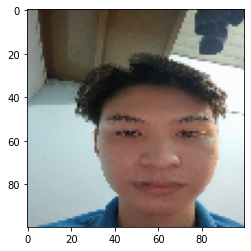

In [10]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Face/test/Ducanh/z3879649510946_b5dc0ac13b1ae5fd99ff4b59f134a061.jpg',target_size = (100,100))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_flower.predict(img)
class_name=['Ducanh','Hoang','Manh']
m= int(np.argmax(result,axis=1))
print("Đây là :", class_name[m])

1/1 [==============================] - 0s 31ms/step
Đây là : Hoang


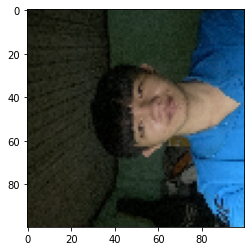

In [11]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Face/test/Hoang/IMG_1471.JPG',target_size = (100,100))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_flower.predict(img)
class_name=['Ducanh','Hoang','Manh']
m= int(np.argmax(result,axis=1))
print("Đây là :", class_name[m])